In [ ]:
import pandas as pd

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('EXP1').sheet1
rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float'})
df = df.astype({'OUTPUT':'float'})
df.head()

,INPUT,OUTPUT
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
X = df[['INPUT']].values
y = df[['OUTPUT']].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.],
       [50.]])

In [ ]:
y

array([[ 11.],
       [ 21.],
       [ 31.],
       [ 41.],
       [ 51.],
       [ 61.],
       [ 71.],
       [ 81.],
       [ 91.],
       [101.],
       [111.],
       [121.],
       [131.],
       [141.],
       [151.],
       [161.],
       [171.],
       [181.],
       [191.],
       [201.],
       [211.],
       [221.],
       [231.],
       [241.],
       [251.],
       [261.],
       [271.],
       [281.],
       [291.],
       [301.],
       [311.],
       [321.],
       [331.],
       [341.],
       [351.],
       [361.],
       [371.],
       [381.],
       [391.],
       [401.],
       [411.],
       [421.],
       [431.],
       [441.],
       [451.],
       [461.],
       [471.],
       [481.],
       [491.],
       [501.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(5,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'mse' )

In [ ]:
model.fit(X_train1, y_train, epochs=2000)

Epoch 1/2000
2/2 [==============================] - 0s 6ms/step - loss: 85333.4766
Epoch 2/2000
2/2 [==============================] - 0s 6ms/step - loss: 85318.6875
Epoch 3/2000
2/2 [==============================] - 0s 6ms/step - loss: 85309.1562
Epoch 4/2000
2/2 [==============================] - 0s 12ms/step - loss: 85298.8750
Epoch 5/2000
2/2 [==============================] - 0s 5ms/step - loss: 85276.8594
Epoch 6/2000
2/2 [==============================] - 0s 5ms/step - loss: 85267.3047
Epoch 7/2000
2/2 [==============================] - 0s 6ms/step - loss: 85254.9375
Epoch 8/2000
2/2 [==============================] - 0s 5ms/step - loss: 85245.8438
Epoch 9/2000
2/2 [==============================] - 0s 5ms/step - loss: 85235.3906
Epoch 10/2000
2/2 [==============================] - 0s 6ms/step - loss: 85214.6797
Epoch 11/2000
2/2 [==============================] - 0s 5ms/step - loss: 85194.3672
Epoch 12/2000
2/2 [==============================] - 0s 6ms/step - loss: 85184.0469


In [ ]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

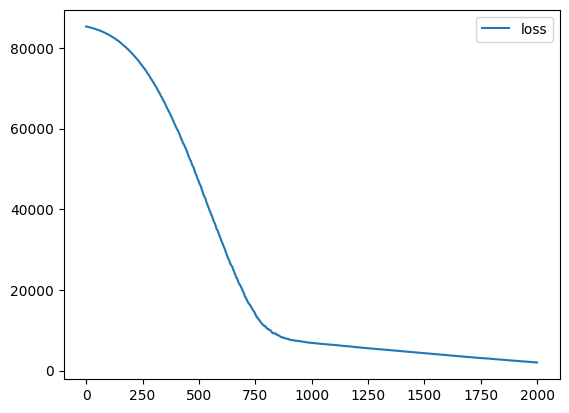

In [ ]:
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

In [ ]:
model.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 23ms/step - loss: 2127.3435


2127.343505859375

In [ ]:
X_n1 = [[30]]

In [ ]:
X_n1_1 = Scaler.transform(X_n1)

In [ ]:
model.predict(X_n1_1)

1/1 [==============================] - 0s 20ms/step


array([[298.76102]], dtype=float32)

In [ ]:
X_n1_1


array([[0.57446809]])